In [138]:
# 고점, 저점 시그널

import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime 

In [143]:
start_date = '2015-07-01'

end_date = datetime.today()
df = data.DataReader('^KS11', 'yahoo', start_date, end_date)

In [144]:
def updown_signal(df, window_size):
    signals = pd.DataFrame(index=df.index)
    signals['signal'] = 0
    signals['high'] = df['Adj Close'].shift(1).rolling(window=window_size).max()
    signals['low'] = df['Adj Close'].shift(1).rolling(window=window_size).min()
    signals['avg'] = df['Adj Close'].shift(1).rolling(window=window_size).mean()
    signals['Adj Close'] = df['Adj Close']
    
    signals['short_entry'] = df['Adj Close'] > signals['high']
    signals['long_entry'] = df['Adj Close'] < signals['low']
    signals['short_exit'] = df['Adj Close'] < signals['avg'] * 1.05
    signals['long_exit'] = df['Adj Close'] > signals['avg'] * 0.95

    position=0
    for k in range(len(signals)):
        if signals['short_entry'][k] and position == 0:
            signals.signal.values[k] = -1
            position = 1
        elif signals['long_entry'][k] and position == 0:
            signals.signal.values[k] = 1
            position = -1
        elif signals['long_exit'][k] and position < 0:
            signals.signal.values[k] = 1
            position = 0
        elif signals['short_exit'][k] and position > 0:
            signals.signal.values[k] = -1
            position = 0
        else:
            signals.signal.values[k] = 0

    return signals

In [145]:
uds=updown_signal(df, 50)

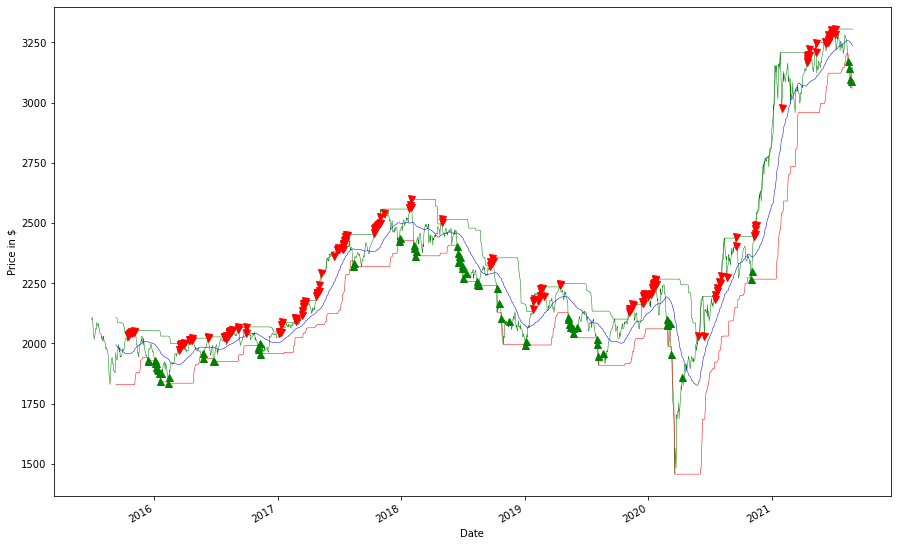

In [146]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(111, ylabel='Price in $')
df["Adj Close"].plot(ax=ax1, color='g', lw=.5)
uds["high"].plot(ax=ax1, color='g', lw=.5)
uds["low"].plot(ax=ax1, color='r', lw=.5)
uds["avg"].plot(ax=ax1, color='b', lw=.5)

ax1.plot(uds.loc[uds.signal== 1.0].index, df["Adj Close"][uds.signal == 1.0],'^', markersize=7, color='green')
ax1.plot(uds.loc[uds.signal== -1.0].index, df["Adj Close"][uds.signal == -1.0],'v', markersize=7, color='red')